In [128]:
#은행 일시상환 대출 금리 일람
import pandas as pd
import numpy as np

#일시상환 금리
loan_dev = pd.read_csv('.\대출금리\가계대출\가계대출금리(일시상환_주담대).csv', encoding='cp949')
loan_dev['은행'] = loan_dev['은행'].str.strip()
loan_dev.columns = ['은행','구분','1~2등급','3~4등급','5~6등급','7~8등급','9~10등급','평균금리','참고사항']
loan_dev.drop([0],axis=0,inplace=True)
loan_dev.drop(['참고사항','구분'],axis=1,inplace=True)

loan_dev['평균금리']=loan_dev['평균금리'].replace('-',np.NaN)
loan_dev.dropna(axis=0,inplace=True)
loan_dev.reset_index(drop=True,inplace=True)
loan_dev.replace('-',0,inplace=True)

loan_dev

,은행,1~2등급,3~4등급,5~6등급,7~8등급,9~10등급,평균금리
0,BNK경남은행,3.07,3.20,0,0,0,3.18
1,DGB대구은행,3.74,4.11,3.81,4.07,0,3.93
2,IBK기업은행,3.60,4.21,0,0,0,3.80
3,KB국민은행,3.97,4.26,0,0,0,4.02
4,NH농협은행,4.51,0,0,0,0,4.51
5,SH수협은행,3.49,0,0,0,0,3.49
6,광주은행,4.02,4.04,0,0,0,4.02
7,신한은행,3.48,3.46,3.82,6.74,0,3.54
8,우리은행,3.28,3.47,3.55,3.29,0,3.37
9,전북은행,0,0,4.44,0,0,4.44


In [129]:
credit_distribution = pd.read_csv('.\신용등급분포.csv', encoding='cp949')
credit_distribution
cd = np.array(credit_distribution['구성 비율']).astype('float')
ac_cd = np.array(credit_distribution['누적비율']).astype('float')

interest_grade = loan_dev.loc[:,'1~2등급':'9~10등급']
credit_distribution

,Unnamed: 0,구성 비율,누적비율
0,1~2 grade,0.501489,0.501489
1,3~4 grade,0.161700,0.663189
2,5~6 grade,0.281889,0.945078
3,7~8grade,0.011915,0.956993
4,9~10 grade,0.043007,1.000000


In [130]:
def make_col(x):
    for i in range(len(x)):
        list = []
        acu = credit_distribution['누적비율']
        cop = credit_distribution['구성 비율']
        for j in range(5) :
            if j <= i :
                list.append(cop[j]/acu[i])
            else:
                list.append(0)
        credit_distribution['case%d'%(i+1)] = list

make_col(credit_distribution)
credit_distribution


,Unnamed: 0,구성 비율,누적비율,case1,case2,case3,case4,case5
0,1~2 grade,0.501489,0.501489,1.0,0.756178,0.530633,0.524026,0.501489
1,3~4 grade,0.161700,0.663189,0.0,0.243822,0.171097,0.168967,0.161700
2,5~6 grade,0.281889,0.945078,0.0,0.000000,0.298270,0.294557,0.281889
3,7~8grade,0.011915,0.956993,0.0,0.000000,0.000000,0.012451,0.011915
4,9~10 grade,0.043007,1.000000,0.0,0.000000,0.000000,0.000000,0.043007


In [131]:

def multi(x):
     #rate_grade=np.array(interest_grade[:][x:x+1],dtype='float')[0]
     rate_grade=np.array(interest_grade.loc[x:x,'1~2등급':'9~10등급'], dtype='float')[0]
     
     if rate_grade[0]==0:
         return rate_grade@np.zeros((5,1))
     elif rate_grade[1] == 0:
        return rate_grade@credit_distribution['case1']
     elif rate_grade[2] == 0:
        return rate_grade@credit_distribution['case2']
     elif rate_grade[3] == 0:
        return rate_grade@credit_distribution['case3']
     elif rate_grade[4] == 0:
        return rate_grade@credit_distribution['case4']
     else:
        return rate_grade@credit_distribution['case5']


a=[]
for i in range(len(interest_grade)):
    a.append(multi(i))

interest_grade['가중평균수익'] = a

interest_grade['가중평균수익'][9]=4.44
interest_grade

C:\Users\LG\AppData\Local\Temp\ipykernel_6812\1272278035.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interest_grade['가중평균수익'][9]=4.44


,1~2등급,3~4등급,5~6등급,7~8등급,9~10등급,가중평균수익
0,3.07,3.20,0,0,0,3.101697
1,3.74,4.11,3.81,4.07,0,3.827245
2,3.60,4.21,0,0,0,3.748731
3,3.97,4.26,0,0,0,4.040708
4,4.51,0,0,0,0,4.51
5,3.49,0,0,0,0,3.49
6,4.02,4.04,0,0,0,4.024876
7,3.48,3.46,3.82,6.74,0,3.617359
8,3.28,3.47,3.55,3.29,0,3.391758
9,0,0,4.44,0,0,4.44


In [133]:
loan_dev['가중평균수익'] = interest_grade['가중평균수익']
loan_dev.groupby('은행').get_group('우리은행')
loan_dev.sort_values('은행')
loan_dev.to_csv('.\대출수익\가계\일시상환.csv', encoding='cp949')

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserW

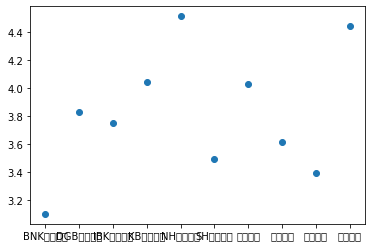

In [139]:
import matplotlib.pyplot as plt

x = loan_dev['은행']
y = loan_dev['가중평균수익']

plt.scatter(x,y)
plt.show()